# Paso 0: Preparación del entorno y carga del dataset

In [110]:
# ==============================
# PASO 0.1 - Importar librerías
# ==============================

import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración visual
plt.style.use("seaborn-v0_8")
sns.set_palette("deep")

# Opciones de pandas
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 120)

print("Librerías cargadas correctamente ✅")




Librerías cargadas correctamente ✅


In [ ]:
# ==============================
# PASO 0.2 - Cargar dataset
# ==============================

# Ruta al archivo (ajustar según tu entorno)
DATA_PATH = "./datasets/flights.csv"

# Carga del dataset
df_flights = pd.read_csv(DATA_PATH)

print("Dataset cargado correctamente ✅")


/tmp/ipython-input-1557578055.py:9: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_flights = pd.read_csv(DATA_PATH)


Dataset cargado correctamente ✅


In [112]:
# ==============================
# PASO 0.3 - Validación inicial
# ==============================

# Dimensión del dataset
print("Dimensiones del dataset:")
print(df_flights.shape)

# Primeras filas
print("\nPrimeras 5 filas:")
display(df_flights.head())

# Tipos de datos
print("\nTipos de datos:")
display(df_flights.dtypes)


Dimensiones del dataset:
(5389776, 31)

Primeras 5 filas:


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430.0,408.0,-22.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750.0,741.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806.0,811.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805.0,756.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320.0,259.0,-21.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN



Tipos de datos:


,0
YEAR,int64
MONTH,int64
DAY,int64
DAY_OF_WEEK,int64
AIRLINE,object
FLIGHT_NUMBER,int64
TAIL_NUMBER,object
ORIGIN_AIRPORT,object
DESTINATION_AIRPORT,object
SCHEDULED_DEPARTURE,int64


In [113]:
# ==============================
# PASO 0.4 - Documentación
# ==============================

dataset_documentation = {
    "nombre_dataset": "2015 Flight Delays and Cancellations",
    "fuente": "Kaggle",
    "periodo": "Año 2015",
    "numero_registros": df_flights.shape[0],
    "numero_variables": df_flights.shape[1],
    "objetivo_proyecto": (
        "Analizar y predecir retrasos y cancelaciones de vuelos "
        "utilizando variables operacionales, temporales y geográficas."
    )
}

dataset_documentation


{'nombre_dataset': '2015 Flight Delays and Cancellations',
 'fuente': 'Kaggle',
 'periodo': 'Año 2015',
 'numero_registros': 5389776,
 'numero_variables': 31,
 'objetivo_proyecto': 'Analizar y predecir retrasos y cancelaciones de vuelos utilizando variables operacionales, temporales y geográficas.'}

# Paso 1: Análisis Exploratorio (EDA) - Base + Calidad de los datos

In [114]:
# ==============================
# PASO 1.1 - Snapshot general
# ==============================

print("Dimensiones:", df_flights.shape)
display(df_flights.head(3))

# Resumen general (incluye nulos)
display(df_flights.info())


Dimensiones: (5389776, 31)


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430.0,408.0,-22.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750.0,741.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806.0,811.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5389776 entries, 0 to 5389775
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    float64
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             float64
 24

None

In [115]:
# ==============================
# PASO 1.2 - Duplicados
# ==============================

dup_rows = df_flights.duplicated().sum()
print(f"Filas duplicadas: {dup_rows:,}")

# (Opcional) Si quieres eliminarlos:
# df_flights = df_flights.drop_duplicates().copy()


Filas duplicadas: 0


In [116]:
# ==============================
# PASO 1.3 - Nulos por columna
# ==============================

nulls = (df_flights.isna().mean() * 100).sort_values(ascending=False)
display(nulls.to_frame("pct_nulls").head(25))

# Conteo absoluto también sirve para reportar
nulls_abs = df_flights.isna().sum().sort_values(ascending=False)
display(nulls_abs.to_frame("null_count").head(25))


,pct_nulls
CANCELLATION_REASON,98.476375
LATE_AIRCRAFT_DELAY,81.907133
WEATHER_DELAY,81.907133
AIRLINE_DELAY,81.907133
AIR_SYSTEM_DELAY,81.907133
SECURITY_DELAY,81.907133
ARRIVAL_DELAY,1.779814
ELAPSED_TIME,1.779796
AIR_TIME,1.779796
TAXI_IN,1.565520


,null_count
CANCELLATION_REASON,5307656
LATE_AIRCRAFT_DELAY,4414611
WEATHER_DELAY,4414611
AIRLINE_DELAY,4414611
AIR_SYSTEM_DELAY,4414611
SECURITY_DELAY,4414611
ARRIVAL_DELAY,95928
ELAPSED_TIME,95927
AIR_TIME,95927
TAXI_IN,84378


In [117]:
# ==============================
# PASO 1.4.1 - Filtrar vuelos NO cancelados
# ==============================

df_nc = df_flights[df_flights["CANCELLED"] == 0].copy()

print("Dimensiones dataset original:", df_flights.shape)
print("Dimensiones vuelos no cancelados:", df_nc.shape)


Dimensiones dataset original: (5389776, 31)
Dimensiones vuelos no cancelados: (5307655, 31)


In [118]:
# ==============================
# PASO 1.4.2 - Crear variable objetivo
# ==============================

# Target binario: 1 = retraso significativo (>15 min), 0 = no retraso
df_nc["TARGET_DELAY_15"] = (df_nc["ARRIVAL_DELAY"] > 15).astype(int)

# Validación rápida
display(df_nc[["ARRIVAL_DELAY", "TARGET_DELAY_15"]].head(10))


,ARRIVAL_DELAY,TARGET_DELAY_15
0,-22.0,0
1,-9.0,0
2,5.0,0
3,-9.0,0
4,-21.0,0
5,8.0,0
6,-17.0,0
7,-10.0,0
8,-13.0,0
9,-15.0,0


In [119]:
# ==============================
# PASO 1.4.3 - Distribución del target
# ==============================

target_dist = df_nc["TARGET_DELAY_15"].value_counts(normalize=True)
display(target_dist.to_frame("proporcion"))

# Conteo absoluto
display(df_nc["TARGET_DELAY_15"].value_counts().to_frame("cantidad"))


,proporcion
TARGET_DELAY_15,
0,0.823215
1,0.176785


,cantidad
TARGET_DELAY_15,
0,4369341
1,938314


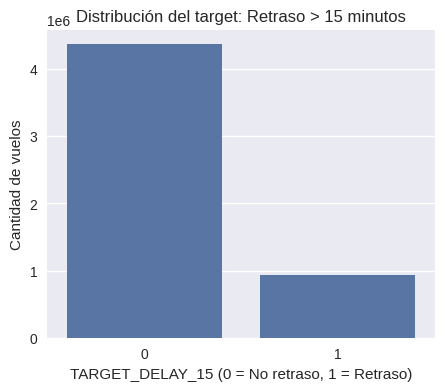

In [120]:
# ==============================
# PASO 1.5.1 - Gráfico de balance
# ==============================

plt.figure(figsize=(5,4))
sns.countplot(x="TARGET_DELAY_15", data=df_nc)
plt.title("Distribución del target: Retraso > 15 minutos")
plt.xlabel("TARGET_DELAY_15 (0 = No retraso, 1 = Retraso)")
plt.ylabel("Cantidad de vuelos")
plt.show()


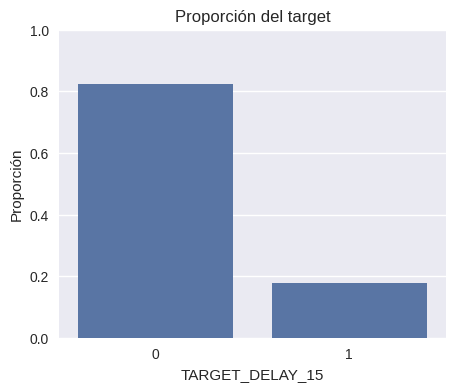

,TARGET_DELAY_15,proporcion
0,0,0.823215
1,1,0.176785


In [121]:
# ==============================
# PASO 1.5.2 - Proporción del target
# ==============================

target_prop = df_nc["TARGET_DELAY_15"].value_counts(normalize=True).reset_index()
target_prop.columns = ["TARGET_DELAY_15", "proporcion"]

plt.figure(figsize=(5,4))
sns.barplot(data=target_prop, x="TARGET_DELAY_15", y="proporcion")
plt.title("Proporción del target")
plt.xlabel("TARGET_DELAY_15")
plt.ylabel("Proporción")
plt.ylim(0,1)
plt.show()

display(target_prop)


In [122]:
# ==============================
# PASO 1.5.3 - Baseline ingenuo
# ==============================

baseline_accuracy = target_prop.loc[target_prop["TARGET_DELAY_15"] == 0, "proporcion"].values[0]
print(f"Baseline accuracy (prediciendo siempre NO retraso): {baseline_accuracy:.2%}")

# ==============================
# PASO 1.5.4 - Métricas a utilizar
# ==============================

metricas = [
    "Precision",
    "Recall",
    "F1-score",
    "ROC-AUC"
]

for m in metricas:
    print("•", m)


Baseline accuracy (prediciendo siempre NO retraso): 82.32%
• Precision
• Recall
• F1-score
• ROC-AUC


# Paso 2: Data Cleaning (Dataset base para el modelado)

In [123]:
# ==============================
# PASO 2.1 - Dataset base
# ==============================

df_clean = df_nc.copy()

print("Dimensiones iniciales:", df_clean.shape)
display(df_clean.head())


Dimensiones iniciales: (5307655, 32)


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,TARGET_DELAY_15
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430.0,408.0,-22.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750.0,741.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806.0,811.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805.0,756.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320.0,259.0,-21.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0


In [124]:
# ==============================
# PASO 2.2 - Eliminación de variables con data leakage
# ==============================

cols_to_drop = [
    # Retrasos y causas
    "ARRIVAL_DELAY",
    "DEPARTURE_DELAY",
    "AIR_SYSTEM_DELAY",
    "WEATHER_DELAY",
    "AIRLINE_DELAY",
    "SECURITY_DELAY",
    "LATE_AIRCRAFT_DELAY",

    # Tiempos reales del vuelo
    "AIR_TIME",
    "ELAPSED_TIME",
    "ARRIVAL_TIME",
    "WHEELS_ON",
    "WHEELS_OFF",
    "TAXI_IN",
    "TAXI_OUT",

    # Cancelaciones
    "CANCELLATION_REASON"
]

df_clean = df_clean.drop(
    columns=[c for c in cols_to_drop if c in df_clean.columns]
)

print("Columnas restantes:", df_clean.columns.tolist())


Columnas restantes: ['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'SCHEDULED_TIME', 'DISTANCE', 'SCHEDULED_ARRIVAL', 'DIVERTED', 'CANCELLED', 'TARGET_DELAY_15']


In [125]:
# ==============================
# PASO 2.3 - Revisión de Consistencia y nulos residuales
# ==============================

# ==============================
# PASO 2.3.1 - Revisión de nulos
# ==============================

nulls = (df_clean.isna().mean() * 100).sort_values(ascending=False)
display(nulls)


,0
SCHEDULED_TIME,0.000019
YEAR,0.000000
MONTH,0.000000
DAY_OF_WEEK,0.000000
DAY,0.000000
FLIGHT_NUMBER,0.000000
TAIL_NUMBER,0.000000
ORIGIN_AIRPORT,0.000000
AIRLINE,0.000000
DESTINATION_AIRPORT,0.000000


In [126]:
# ==============================
# PASO 2.3.2 - Columnas constantes
# ==============================

for col in df_clean.columns:
    unique_vals = df_clean[col].nunique()
    if unique_vals == 1:
        print(f"Columna constante detectada: {col}")


Columna constante detectada: YEAR
Columna constante detectada: CANCELLED


In [127]:
# ==============================
# PASO 2.3.3 - Revisión de DIVERTED
# ==============================

# Conteo absoluto
diverted_counts = df_clean["DIVERTED"].value_counts(dropna=False)
print("Conteo de DIVERTED:")
print(diverted_counts)

# Proporción
diverted_ratio = df_clean["DIVERTED"].value_counts(normalize=True)
print("\nProporción de DIVERTED:")
print(diverted_ratio)


Conteo de DIVERTED:
DIVERTED
0.0    5293848
1.0      13807
Name: count, dtype: int64

Proporción de DIVERTED:
DIVERTED
0.0    0.997399
1.0    0.002601
Name: proportion, dtype: float64


In [128]:
# ==============================
# PASO 2.3.4 - Cardinalidad por columna
# ==============================

cardinality = (
    df_clean.nunique()
    .sort_values(ascending=False)
    .to_frame("n_unique")
)

display(cardinality)


,n_unique
FLIGHT_NUMBER,6892
TAIL_NUMBER,4855
DEPARTURE_TIME,1440
SCHEDULED_ARRIVAL,1429
DISTANCE,1353
SCHEDULED_DEPARTURE,1311
DESTINATION_AIRPORT,930
ORIGIN_AIRPORT,929
SCHEDULED_TIME,543
DAY,31


In [129]:
# ==============================
# PASO 2.3.5 - Chequeo final
# ==============================

print("Dimensiones finales del dataset:")
print(df_clean.shape)

print("\nTipos de datos:")
display(df_clean.dtypes)

print("\nPrimeras filas del dataset:")
display(df_clean.head())


Dimensiones finales del dataset:
(5307655, 17)

Tipos de datos:


,0
YEAR,int64
MONTH,int64
DAY,int64
DAY_OF_WEEK,int64
AIRLINE,object
FLIGHT_NUMBER,int64
TAIL_NUMBER,object
ORIGIN_AIRPORT,object
DESTINATION_AIRPORT,object
SCHEDULED_DEPARTURE,int64



Primeras filas del dataset:


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,DIVERTED,CANCELLED,TARGET_DELAY_15
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,205.0,1448,430.0,0.0,0.0,0
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,280.0,2330,750.0,0.0,0.0,0
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,286.0,2296,806.0,0.0,0.0,0
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,285.0,2342,805.0,0.0,0.0,0
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,235.0,1448,320.0,0.0,0.0,0


In [130]:
# ==============================
# Paso 2.3.6 - Eliminar columnas constantes
# ==============================

df_clean = df_clean.drop(columns=["YEAR", "CANCELLED"])

print("Columnas finales tras cerrar Tarjeta 2:")
print(df_clean.columns.tolist())

print("\nDimensiones finales:")
print(df_clean.shape)


Columnas finales tras cerrar Tarjeta 2:
['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'SCHEDULED_TIME', 'DISTANCE', 'SCHEDULED_ARRIVAL', 'DIVERTED', 'TARGET_DELAY_15']

Dimensiones finales:
(5307655, 15)


#Paso 3: Generación de Features

## Pas 3.1: creación de features temporales (parte 1)
### **Objetivo de este subpaso:** Crear las primeras features temporales definidas en el Paso 3.1, derivadas únicamente del horario programado, sin introducir data leakage.

In [131]:
# ==============================
# PASO 3.1.1 - Franja horaria de salida
# ==============================

def departure_time_block(scheduled_departure):
    """
    Asigna una franja horaria a partir del horario programado (HHMM).
    """
    hour = int(scheduled_departure // 100)

    if 0 <= hour < 6:
        return "madrugada"
    elif 6 <= hour < 12:
        return "mañana"
    elif 12 <= hour < 18:
        return "tarde"
    else:
        return "noche"


# Crear la nueva feature
df_features = df_clean.copy()
df_features["DEPARTURE_TIME_BLOCK"] = df_features["SCHEDULED_DEPARTURE"].apply(departure_time_block)

# Validación rápida
df_features[["SCHEDULED_DEPARTURE", "DEPARTURE_TIME_BLOCK"]].head()


,SCHEDULED_DEPARTURE,DEPARTURE_TIME_BLOCK
0,5,madrugada
1,10,madrugada
2,20,madrugada
3,20,madrugada
4,25,madrugada


In [132]:
# ==============================
# PASO 3.1.2 - Indicador de fin de semana
# ==============================

# 1 si es sábado (6) o domingo (7); si no, 0
df_features["IS_WEEKEND"] = df_features["DAY_OF_WEEK"].isin([6, 7]).astype(int)

# Validación rápida: ver distribución y algunas filas
print(df_features["IS_WEEKEND"].value_counts(normalize=True))
df_features[["DAY_OF_WEEK", "IS_WEEKEND"]].head(10)


IS_WEEKEND
0    0.73972
1    0.26028
Name: proportion, dtype: float64


,DAY_OF_WEEK,IS_WEEKEND
0,4,0
1,4,0
2,4,0
3,4,0
4,4,0
5,4,0
6,4,0
7,4,0
8,4,0
9,4,0


In [133]:
# ==============================
# PASO 3.1.3 - Indicador de vuelo nocturno
# ==============================

def is_night_flight(scheduled_departure):
    """
    Retorna 1 si el vuelo está programado en horario nocturno (22:00 - 05:59),
    0 en caso contrario.
    """
    hour = int(scheduled_departure // 100)
    return int(hour >= 22 or hour < 6)


# Crear la nueva feature
df_features["IS_NIGHT_FLIGHT"] = df_features["SCHEDULED_DEPARTURE"].apply(is_night_flight)

# Validación rápida
print(df_features["IS_NIGHT_FLIGHT"].value_counts(normalize=True))
df_features[["SCHEDULED_DEPARTURE", "IS_NIGHT_FLIGHT"]].head(10)


IS_NIGHT_FLIGHT
0    0.948734
1    0.051266
Name: proportion, dtype: float64


,SCHEDULED_DEPARTURE,IS_NIGHT_FLIGHT
0,5,1
1,10,1
2,20,1
3,20,1
4,25,1
5,25,1
6,25,1
7,30,1
8,30,1
9,30,1


In [134]:
# ==============================
# PASO 3.1.4 - Categoría de distancia
# ==============================

def distance_category(distance):
    """
    Clasifica la distancia del vuelo en categorías operativas.
    """
    if distance <= 500:
        return "corta"
    elif distance <= 1500:
        return "media"
    else:
        return "larga"


# Crear la nueva feature
df_features["DISTANCE_CATEGORY"] = df_features["DISTANCE"].apply(distance_category)

# Validación rápida
print(df_features["DISTANCE_CATEGORY"].value_counts(normalize=True))
df_features[["DISTANCE", "DISTANCE_CATEGORY"]].head(10)


DISTANCE_CATEGORY
media    0.498204
corta    0.366073
larga    0.135724
Name: proportion, dtype: float64


,DISTANCE,DISTANCE_CATEGORY
0,1448,media
1,2330,larga
2,2296,larga
3,2342,larga
4,1448,media
5,1589,larga
6,1299,media
7,2125,larga
8,1464,media
9,1747,larga


In [135]:
# ==============================
# PASO 3.1.5 - Categoría de duración programada
# ==============================

def duration_category(minutes):
    """
    Clasifica la duración programada del vuelo en categorías operativas.
    """
    if minutes <= 90:
        return "corta"
    elif minutes <= 240:
        return "media"
    else:
        return "larga"


# Crear la nueva feature
df_features["DURATION_CATEGORY"] = df_features["SCHEDULED_TIME"].apply(duration_category)

# Validación rápida
print(df_features["DURATION_CATEGORY"].value_counts(normalize=True))
df_features[["SCHEDULED_TIME", "DURATION_CATEGORY"]].head(10)


DURATION_CATEGORY
media    0.599735
corta    0.290566
larga    0.109699
Name: proportion, dtype: float64


,SCHEDULED_TIME,DURATION_CATEGORY
0,205.0,media
1,280.0,larga
2,286.0,larga
3,285.0,larga
4,235.0,media
5,217.0,media
6,181.0,media
7,273.0,larga
8,195.0,media
9,221.0,media


In [136]:
# ==============================
# PASO 3.1.6 - Hora programada de salida
# ==============================

# Extraer la hora (0–23) desde el formato HHMM
df_features["SCHEDULED_DEPARTURE_HOUR"] = (
    df_features["SCHEDULED_DEPARTURE"] // 100
).astype(int)

# Validación rápida
print(df_features["SCHEDULED_DEPARTURE_HOUR"].describe())
df_features[["SCHEDULED_DEPARTURE", "SCHEDULED_DEPARTURE_HOUR"]].head(10)


count    5.307655e+06
mean     1.302057e+01
std      4.818624e+00
min      0.000000e+00
25%      9.000000e+00
50%      1.300000e+01
75%      1.700000e+01
max      2.300000e+01
Name: SCHEDULED_DEPARTURE_HOUR, dtype: float64


,SCHEDULED_DEPARTURE,SCHEDULED_DEPARTURE_HOUR
0,5,0
1,10,0
2,20,0
3,20,0
4,25,0
5,25,0
6,25,0
7,30,0
8,30,0
9,30,0


In [137]:
# ==============================
# PASO 3.1.7 - Indicador de hora punta (rush hour)
# ==============================

def is_rush_hour(hour):
    """
    Retorna 1 si la hora está dentro de los rangos de hora punta:
    07–09 o 16–18. Retorna 0 en caso contrario.
    """
    return int((7 <= hour <= 9) or (16 <= hour <= 18))


# Crear la nueva feature
df_features["IS_RUSH_HOUR"] = df_features["SCHEDULED_DEPARTURE_HOUR"].apply(is_rush_hour)

# Validación rápida
print(df_features["IS_RUSH_HOUR"].value_counts(normalize=True))
df_features[["SCHEDULED_DEPARTURE_HOUR", "IS_RUSH_HOUR"]].head(10)


IS_RUSH_HOUR
0    0.624181
1    0.375819
Name: proportion, dtype: float64


,SCHEDULED_DEPARTURE_HOUR,IS_RUSH_HOUR
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [138]:
# ==============================
# PASO 3.1.8 - Estacionalidad del año
# ==============================

def season_from_month(month):
    """
    Asigna una temporada a partir del mes.
    """
    if month in [12, 1, 2]:
        return "invierno"
    elif month in [3, 4, 5]:
        return "primavera"
    elif month in [6, 7, 8]:
        return "verano"
    else:
        return "otoño"


# Crear la nueva feature
df_features["SEASON"] = df_features["MONTH"].apply(season_from_month)

# Validación rápida
print(df_features["SEASON"].value_counts(normalize=True))
df_features[["MONTH", "SEASON"]].head(10)


SEASON
verano       0.285658
primavera    0.276062
otoño        0.265646
invierno     0.172635
Name: proportion, dtype: float64


,MONTH,SEASON
0,1,invierno
1,1,invierno
2,1,invierno
3,1,invierno
4,1,invierno
5,1,invierno
6,1,invierno
7,1,invierno
8,1,invierno
9,1,invierno


In [139]:
# ==============================
# PASO 3.1.9 - Complejidad operativa del vuelo
# ==============================

df_features["IS_COMPLEX_FLIGHT"] = (
    (df_features["DISTANCE_CATEGORY"] == "larga") |
    (df_features["DURATION_CATEGORY"] == "larga")
).astype(int)

# Validación rápida
print(df_features["IS_COMPLEX_FLIGHT"].value_counts(normalize=True))
df_features[
    ["DISTANCE_CATEGORY", "DURATION_CATEGORY", "IS_COMPLEX_FLIGHT"]
].head(10)


IS_COMPLEX_FLIGHT
0    0.861383
1    0.138617
Name: proportion, dtype: float64


,DISTANCE_CATEGORY,DURATION_CATEGORY,IS_COMPLEX_FLIGHT
0,media,media,0
1,larga,larga,1
2,larga,larga,1
3,larga,larga,1
4,media,media,0
5,larga,media,1
6,media,media,0
7,larga,larga,1
8,media,media,0
9,larga,media,1


In [140]:
# ==========================================
# FIX ROBUSTO: is_high_traffic_route sin dejar ROUTE
# ==========================================

# 0) Asegurar que estamos usando el dataframe correcto
print("✅ DataFrame:", "df_features" if "df_features" in globals() else "NO EXISTE df_features")
print("✅ Columnas actuales (primeras 30):", list(df_features.columns)[:30])
print("✅ Total columnas:", len(df_features.columns))

# 1) Verificación mínima: columnas base requeridas
required_cols = ["ORIGIN_AIRPORT", "DESTINATION_AIRPORT"]
missing = [c for c in required_cols if c not in df_features.columns]
if missing:
    raise KeyError(f"Faltan columnas necesarias para construir ROUTE: {missing}")

# 2) Crear ROUTE SIEMPRE (temporal)
df_features["ROUTE"] = df_features["ORIGIN_AIRPORT"].astype(str) + "_" + df_features["DESTINATION_AIRPORT"].astype(str)

# 3) Calcular rutas de alta demanda (top 25% por frecuencia)
route_counts = df_features["ROUTE"].value_counts()
threshold = route_counts.quantile(0.75)

df_features["is_high_traffic_route"] = (df_features["ROUTE"].map(route_counts) >= threshold).astype(int)

# 4) Eliminar ROUTE para no dejarla como feature final
df_features.drop(columns=["ROUTE"], inplace=True)

# 5) Validación mínima
print("\n✅ is_high_traffic_route listo:")
print(df_features["is_high_traffic_route"].value_counts(normalize=True))

print("\n✅ Columnas actuales (primeras 30):", list(df_features.columns)[:30])
print("✅ Total columnas:", len(df_features.columns))


✅ DataFrame: df_features
✅ Columnas actuales (primeras 30): ['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'SCHEDULED_TIME', 'DISTANCE', 'SCHEDULED_ARRIVAL', 'DIVERTED', 'TARGET_DELAY_15', 'DEPARTURE_TIME_BLOCK', 'IS_WEEKEND', 'IS_NIGHT_FLIGHT', 'DISTANCE_CATEGORY', 'DURATION_CATEGORY', 'SCHEDULED_DEPARTURE_HOUR', 'IS_RUSH_HOUR', 'SEASON', 'IS_COMPLEX_FLIGHT']
✅ Total columnas: 24

✅ is_high_traffic_route listo:
is_high_traffic_route
1    0.770529
0    0.229471
Name: proportion, dtype: float64

✅ Columnas actuales (primeras 30): ['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'SCHEDULED_TIME', 'DISTANCE', 'SCHEDULED_ARRIVAL', 'DIVERTED', 'TARGET_DELAY_15', 'DEPARTURE_TIME_BLOCK', 'IS_WEEKEND', 'IS_NIGHT_FLIGHT', 'DISTANCE_CATEGORY', 'DURATION_CATEGORY', 'SCHEDULED_DEPART

In [141]:
"ROUTE" in df_features.columns


False

# Paso 4: Codificación de variables categóricas

##Objetivo: Transformar las variables categóricas finales en formatos numéricos que puedan ser usados por los modelos de ML, sin alterar la lógica de las features creadas.

## Paso 4.1: Identificar Variables Categóricas

In [142]:
df_features.columns.tolist()



['MONTH',
 'DAY',
 'DAY_OF_WEEK',
 'AIRLINE',
 'FLIGHT_NUMBER',
 'TAIL_NUMBER',
 'ORIGIN_AIRPORT',
 'DESTINATION_AIRPORT',
 'SCHEDULED_DEPARTURE',
 'DEPARTURE_TIME',
 'SCHEDULED_TIME',
 'DISTANCE',
 'SCHEDULED_ARRIVAL',
 'DIVERTED',
 'TARGET_DELAY_15',
 'DEPARTURE_TIME_BLOCK',
 'IS_WEEKEND',
 'IS_NIGHT_FLIGHT',
 'DISTANCE_CATEGORY',
 'DURATION_CATEGORY',
 'SCHEDULED_DEPARTURE_HOUR',
 'IS_RUSH_HOUR',
 'SEASON',
 'IS_COMPLEX_FLIGHT',
 'is_high_traffic_route']

In [143]:
df_features[
    [
        "DEPARTURE_TIME_BLOCK",
        "SEASON",
        "DISTANCE_CATEGORY",
        "DURATION_CATEGORY",
        "SCHEDULED_DEPARTURE_HOUR",
        "IS_RUSH_HOUR",
        "IS_WEEKEND",
        "IS_COMPLEX_FLIGHT",
        "IS_NIGHT_FLIGHT",
        "is_high_traffic_route",
        "TARGET_DELAY_15",
    ]
].dtypes


,0
DEPARTURE_TIME_BLOCK,object
SEASON,object
DISTANCE_CATEGORY,object
DURATION_CATEGORY,object
SCHEDULED_DEPARTURE_HOUR,int64
IS_RUSH_HOUR,int64
IS_WEEKEND,int64
IS_COMPLEX_FLIGHT,int64
IS_NIGHT_FLIGHT,int64
is_high_traffic_route,int64


## Paso 4.2: One-Hot Encoding de variables categóricas

In [144]:
# ==============================
# PASO 4.2 - One-Hot Encoding
# ==============================

categorical_cols = [
    "DEPARTURE_TIME_BLOCK",
    "SEASON",
    "DISTANCE_CATEGORY",
    "DURATION_CATEGORY",
]

df_encoded = pd.get_dummies(
    df_features,
    columns=categorical_cols,
    drop_first=True
)

# Validación mínima
print("Columnas originales:", df_features.shape[1])
print("Columnas tras encoding:", df_encoded.shape[1])

# Chequeo rápido: que el target siga presente
assert "TARGET_DELAY_15" in df_encoded.columns, "❌ Target perdido tras encoding"



# Convertir columnas booleanas a int (0/1)
bool_cols = df_encoded.select_dtypes(include="bool").columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

df_encoded.head()


Columnas originales: 25
Columnas tras encoding: 31


,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,DIVERTED,TARGET_DELAY_15,IS_WEEKEND,IS_NIGHT_FLIGHT,SCHEDULED_DEPARTURE_HOUR,IS_RUSH_HOUR,IS_COMPLEX_FLIGHT,is_high_traffic_route,DEPARTURE_TIME_BLOCK_mañana,DEPARTURE_TIME_BLOCK_noche,DEPARTURE_TIME_BLOCK_tarde,SEASON_otoño,SEASON_primavera,SEASON_verano,DISTANCE_CATEGORY_larga,DISTANCE_CATEGORY_media,DURATION_CATEGORY_larga,DURATION_CATEGORY_media
0,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,205.0,1448,430.0,0.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1
1,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,280.0,2330,750.0,0.0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0
2,1,1,4,US,840,N171US,SFO,CLT,20,18.0,286.0,2296,806.0,0.0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,1,0
3,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,285.0,2342,805.0,0.0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,1,0
4,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,235.0,1448,320.0,0.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1


In [145]:
# ==============================
# PASO 4.3 - Dataset final para modelado (re-ejecutado)
# ==============================

model_features = [
    # Numéricas / binarias (ya vienen como int)
    "SCHEDULED_DEPARTURE_HOUR",
    "IS_RUSH_HOUR",
    "IS_WEEKEND",
    "IS_COMPLEX_FLIGHT",
    "IS_NIGHT_FLIGHT",
    "is_high_traffic_route",

    # One-Hot encoded (ahora también int: 0/1)
    "DEPARTURE_TIME_BLOCK_mañana",
    "DEPARTURE_TIME_BLOCK_tarde",
    "DEPARTURE_TIME_BLOCK_noche",
    "SEASON_primavera",
    "SEASON_verano",
    "DISTANCE_CATEGORY_larga",
    "DISTANCE_CATEGORY_media",
    "DURATION_CATEGORY_larga",
    "DURATION_CATEGORY_media",
]

target = "TARGET_DELAY_15"

df_model = df_encoded[model_features + [target]]

# Validaciones mínimas
print("Dimensiones dataset final:", df_model.shape)
print("\nTipos de datos (conteo):")
print(df_model.dtypes.value_counts())

# Mostrar tipos por columna (opcional, por si quieres evidencia para Trello)
print("\nTipos por columna:")
print(df_model.dtypes)

df_model.head()


Dimensiones dataset final: (5307655, 16)

Tipos de datos (conteo):
int64    16
Name: count, dtype: int64

Tipos por columna:
SCHEDULED_DEPARTURE_HOUR       int64
IS_RUSH_HOUR                   int64
IS_WEEKEND                     int64
IS_COMPLEX_FLIGHT              int64
IS_NIGHT_FLIGHT                int64
is_high_traffic_route          int64
DEPARTURE_TIME_BLOCK_mañana    int64
DEPARTURE_TIME_BLOCK_tarde     int64
DEPARTURE_TIME_BLOCK_noche     int64
SEASON_primavera               int64
SEASON_verano                  int64
DISTANCE_CATEGORY_larga        int64
DISTANCE_CATEGORY_media        int64
DURATION_CATEGORY_larga        int64
DURATION_CATEGORY_media        int64
TARGET_DELAY_15                int64
dtype: object


,SCHEDULED_DEPARTURE_HOUR,IS_RUSH_HOUR,IS_WEEKEND,IS_COMPLEX_FLIGHT,IS_NIGHT_FLIGHT,is_high_traffic_route,DEPARTURE_TIME_BLOCK_mañana,DEPARTURE_TIME_BLOCK_tarde,DEPARTURE_TIME_BLOCK_noche,SEASON_primavera,SEASON_verano,DISTANCE_CATEGORY_larga,DISTANCE_CATEGORY_media,DURATION_CATEGORY_larga,DURATION_CATEGORY_media,TARGET_DELAY_15
0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0
1,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0
2,0,0,0,1,1,1,0,0,0,0,0,1,0,1,0,0
3,0,0,0,1,1,1,0,0,0,0,0,1,0,1,0,0
4,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0


In [146]:
df_model.shape

(5307655, 16)